In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: USDT-USD
Start: 2021-01-22 19:30:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1286 
Tsesting data: 1286 


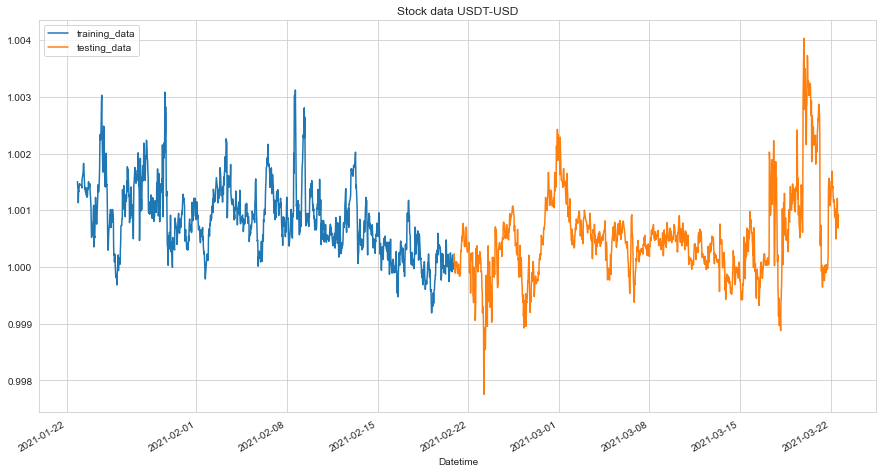

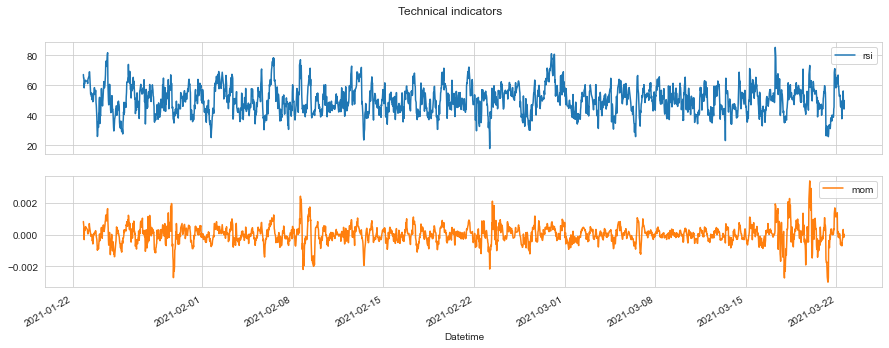

In [2]:
stock_name = 'usdt-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1000.02, duration: 0:00:00.226070
episode: 2/2000, episode end value: 1000.02, duration: 0:00:00.242041
episode: 3/2000, episode end value: 1000.02, duration: 0:00:00.239048
episode: 4/2000, episode end value: 1000.02, duration: 0:00:00.236065
episode: 5/2000, episode end value: 1000.02, duration: 0:00:00.236052
episode: 6/2000, episode end value: 1000.02, duration: 0:00:00.238041
episode: 7/2000, episode end value: 1000.02, duration: 0:00:00.235045
episode: 8/2000, episode end value: 1000.02, duration: 0:00:00.239065
episode: 9/2000, episode end value: 1000.02, duration: 0:00:00.243054
episode: 10/2000, episode end value: 1000.02, duration: 0:00:00.245048
episode: 11/2000, episode end value: 1000.02, duration: 0:00:00.246074
episode: 12/2000, episode end value: 1000.02, duration: 0:00:00.245044
episode: 13/2000, episode end value: 1000.02, duration: 0:00:00.242056
episode: 14/2000, episode end value: 1000.02, duration: 0:00:00.245054
episode: 15/200

episode: 117/2000, episode end value: 1000.02, duration: 0:00:00.246056
episode: 118/2000, episode end value: 1000.02, duration: 0:00:00.241053
episode: 119/2000, episode end value: 1000.02, duration: 0:00:00.239053
episode: 120/2000, episode end value: 1000.02, duration: 0:00:00.244055
episode: 121/2000, episode end value: 1000.02, duration: 0:00:00.239053
episode: 122/2000, episode end value: 1000.02, duration: 0:00:00.241054
episode: 123/2000, episode end value: 1000.02, duration: 0:00:00.249056
episode: 124/2000, episode end value: 1000.02, duration: 0:00:00.244054
episode: 125/2000, episode end value: 1000.02, duration: 0:00:00.241055
episode: 126/2000, episode end value: 1000.02, duration: 0:00:00.247055
episode: 127/2000, episode end value: 1000.02, duration: 0:00:00.241055
episode: 128/2000, episode end value: 1000.02, duration: 0:00:00.243054
episode: 129/2000, episode end value: 1000.02, duration: 0:00:00.251056
episode: 130/2000, episode end value: 1000.02, duration: 0:00:00

episode: 231/2000, episode end value: 1000.01, duration: 0:00:00.176039
episode: 232/2000, episode end value: 999.99, duration: 0:00:00.171037
episode: 233/2000, episode end value: 1000.00, duration: 0:00:00.175039
episode: 234/2000, episode end value: 1000.00, duration: 0:00:00.172038
episode: 235/2000, episode end value: 1000.01, duration: 0:00:00.175040
episode: 236/2000, episode end value: 1000.00, duration: 0:00:00.166036
episode: 237/2000, episode end value: 999.99, duration: 0:00:00.170037
episode: 238/2000, episode end value: 1000.00, duration: 0:00:00.166037
episode: 239/2000, episode end value: 1000.02, duration: 0:00:00.214047
episode: 240/2000, episode end value: 1000.01, duration: 0:00:00.165039
episode: 241/2000, episode end value: 999.99, duration: 0:00:00.169036
episode: 242/2000, episode end value: 1000.00, duration: 0:00:00.170038
episode: 243/2000, episode end value: 1000.00, duration: 0:00:00.179042
episode: 244/2000, episode end value: 1000.00, duration: 0:00:00.19

episode: 345/2000, episode end value: 1000.00, duration: 0:00:00.165022
episode: 346/2000, episode end value: 1000.01, duration: 0:00:00.186041
episode: 347/2000, episode end value: 1000.01, duration: 0:00:00.177039
episode: 348/2000, episode end value: 1000.00, duration: 0:00:00.171038
episode: 349/2000, episode end value: 1000.01, duration: 0:00:00.174039
episode: 350/2000, episode end value: 1000.00, duration: 0:00:00.171038
episode: 351/2000, episode end value: 999.99, duration: 0:00:00.165038
episode: 352/2000, episode end value: 1000.01, duration: 0:00:00.187041
episode: 353/2000, episode end value: 1000.02, duration: 0:00:00.190042
episode: 354/2000, episode end value: 1000.00, duration: 0:00:00.171038
episode: 355/2000, episode end value: 1000.00, duration: 0:00:00.168038
episode: 356/2000, episode end value: 1000.01, duration: 0:00:00.169038
episode: 357/2000, episode end value: 1000.00, duration: 0:00:00.162035
episode: 358/2000, episode end value: 1000.01, duration: 0:00:00.

episode: 459/2000, episode end value: 1000.00, duration: 0:00:00.197049
episode: 460/2000, episode end value: 1000.00, duration: 0:00:00.194043
episode: 461/2000, episode end value: 1000.00, duration: 0:00:00.190043
episode: 462/2000, episode end value: 1000.00, duration: 0:00:00.175040
episode: 463/2000, episode end value: 1000.00, duration: 0:00:00.186043
episode: 464/2000, episode end value: 1000.01, duration: 0:00:00.189044
episode: 465/2000, episode end value: 1000.02, duration: 0:00:00.198044
episode: 466/2000, episode end value: 1000.00, duration: 0:00:00.185040
episode: 467/2000, episode end value: 1000.00, duration: 0:00:00.183057
episode: 468/2000, episode end value: 1000.00, duration: 0:00:00.196028
episode: 469/2000, episode end value: 1000.00, duration: 0:00:00.171043
episode: 470/2000, episode end value: 1000.00, duration: 0:00:00.178032
episode: 471/2000, episode end value: 1000.01, duration: 0:00:00.213049
episode: 472/2000, episode end value: 1000.00, duration: 0:00:00

episode: 574/2000, episode end value: 1000.01, duration: 0:00:00.195038
episode: 575/2000, episode end value: 1000.00, duration: 0:00:00.185040
episode: 576/2000, episode end value: 1000.01, duration: 0:00:00.190043
episode: 577/2000, episode end value: 999.99, duration: 0:00:00.184042
episode: 578/2000, episode end value: 1000.00, duration: 0:00:00.199046
episode: 579/2000, episode end value: 1000.00, duration: 0:00:00.190043
episode: 580/2000, episode end value: 1000.00, duration: 0:00:00.192040
episode: 581/2000, episode end value: 1000.02, duration: 0:00:00.223049
episode: 582/2000, episode end value: 1000.00, duration: 0:00:00.204048
episode: 583/2000, episode end value: 1000.00, duration: 0:00:00.199044
episode: 584/2000, episode end value: 1000.00, duration: 0:00:00.197044
episode: 585/2000, episode end value: 1000.01, duration: 0:00:00.203046
episode: 586/2000, episode end value: 1000.00, duration: 0:00:00.177047
episode: 587/2000, episode end value: 1000.00, duration: 0:00:00.

episode: 688/2000, episode end value: 1000.01, duration: 0:00:00.257055
episode: 689/2000, episode end value: 1000.01, duration: 0:00:00.226049
episode: 690/2000, episode end value: 1000.01, duration: 0:00:00.236053
episode: 691/2000, episode end value: 1000.00, duration: 0:00:00.226049
episode: 692/2000, episode end value: 1000.01, duration: 0:00:00.259062
episode: 693/2000, episode end value: 1000.01, duration: 0:00:00.208045
episode: 694/2000, episode end value: 1000.01, duration: 0:00:00.214049
episode: 695/2000, episode end value: 1000.01, duration: 0:00:00.231057
episode: 696/2000, episode end value: 1000.00, duration: 0:00:00.203047
episode: 697/2000, episode end value: 1000.00, duration: 0:00:00.196045
episode: 698/2000, episode end value: 1000.01, duration: 0:00:00.217048
episode: 699/2000, episode end value: 1000.01, duration: 0:00:00.193057
episode: 700/2000, episode end value: 999.99, duration: 0:00:00.185025
episode: 701/2000, episode end value: 1000.01, duration: 0:00:00.

episode: 802/2000, episode end value: 1000.00, duration: 0:00:00.232052
episode: 803/2000, episode end value: 1000.00, duration: 0:00:00.290061
episode: 804/2000, episode end value: 1000.01, duration: 0:00:00.294068
episode: 805/2000, episode end value: 1000.02, duration: 0:00:00.289062
episode: 806/2000, episode end value: 1000.01, duration: 0:00:00.227050
episode: 807/2000, episode end value: 1000.00, duration: 0:00:00.207049
episode: 808/2000, episode end value: 1000.01, duration: 0:00:00.220047
episode: 809/2000, episode end value: 1000.01, duration: 0:00:00.218052
episode: 810/2000, episode end value: 999.99, duration: 0:00:00.222042
episode: 811/2000, episode end value: 1000.00, duration: 0:00:00.230051
episode: 812/2000, episode end value: 1000.01, duration: 0:00:00.244053
episode: 813/2000, episode end value: 1000.00, duration: 0:00:00.208049
episode: 814/2000, episode end value: 1000.01, duration: 0:00:00.214042
episode: 815/2000, episode end value: 1000.01, duration: 0:00:00.

episode: 916/2000, episode end value: 1000.00, duration: 0:00:00.211050
episode: 917/2000, episode end value: 1000.01, duration: 0:00:00.219045
episode: 918/2000, episode end value: 1000.00, duration: 0:00:00.212046
episode: 919/2000, episode end value: 999.99, duration: 0:00:00.199047
episode: 920/2000, episode end value: 999.99, duration: 0:00:00.207046
episode: 921/2000, episode end value: 1000.00, duration: 0:00:00.229053
episode: 922/2000, episode end value: 1000.01, duration: 0:00:00.224045
episode: 923/2000, episode end value: 1000.00, duration: 0:00:00.221048
episode: 924/2000, episode end value: 1000.01, duration: 0:00:00.244055
episode: 925/2000, episode end value: 1000.01, duration: 0:00:00.208044
episode: 926/2000, episode end value: 1000.01, duration: 0:00:00.234055
episode: 927/2000, episode end value: 1000.01, duration: 0:00:00.212051
episode: 928/2000, episode end value: 999.99, duration: 0:00:00.210042
episode: 929/2000, episode end value: 999.99, duration: 0:00:00.219

episode: 1030/2000, episode end value: 1000.00, duration: 0:00:00.220046
episode: 1031/2000, episode end value: 1000.00, duration: 0:00:00.217050
episode: 1032/2000, episode end value: 1000.00, duration: 0:00:00.225050
episode: 1033/2000, episode end value: 999.99, duration: 0:00:00.221049
episode: 1034/2000, episode end value: 1000.00, duration: 0:00:00.213045
episode: 1035/2000, episode end value: 999.99, duration: 0:00:00.218049
episode: 1036/2000, episode end value: 999.99, duration: 0:00:00.234051
episode: 1037/2000, episode end value: 1000.01, duration: 0:00:00.280064
episode: 1038/2000, episode end value: 1000.00, duration: 0:00:00.215047
episode: 1039/2000, episode end value: 1000.01, duration: 0:00:00.239054
episode: 1040/2000, episode end value: 1000.01, duration: 0:00:00.236052
episode: 1041/2000, episode end value: 1000.00, duration: 0:00:00.228055
episode: 1042/2000, episode end value: 1000.00, duration: 0:00:00.220050
episode: 1043/2000, episode end value: 1000.00, durati

episode: 1143/2000, episode end value: 1000.00, duration: 0:00:00.230050
episode: 1144/2000, episode end value: 1000.01, duration: 0:00:00.293065
episode: 1145/2000, episode end value: 999.99, duration: 0:00:00.217046
episode: 1146/2000, episode end value: 1000.00, duration: 0:00:00.228048
episode: 1147/2000, episode end value: 1000.00, duration: 0:00:00.223053
episode: 1148/2000, episode end value: 1000.02, duration: 0:00:00.294065
episode: 1149/2000, episode end value: 1000.01, duration: 0:00:00.219050
episode: 1150/2000, episode end value: 1000.01, duration: 0:00:00.229049
episode: 1151/2000, episode end value: 1000.01, duration: 0:00:00.241055
episode: 1152/2000, episode end value: 1000.00, duration: 0:00:00.211044
episode: 1153/2000, episode end value: 999.99, duration: 0:00:00.213047
episode: 1154/2000, episode end value: 1000.01, duration: 0:00:00.232055
episode: 1155/2000, episode end value: 999.99, duration: 0:00:00.293067
episode: 1156/2000, episode end value: 1000.01, durati

episode: 1256/2000, episode end value: 1000.00, duration: 0:00:00.233056
episode: 1257/2000, episode end value: 1000.00, duration: 0:00:00.227047
episode: 1258/2000, episode end value: 1000.00, duration: 0:00:00.227052
episode: 1259/2000, episode end value: 1000.00, duration: 0:00:00.237054
episode: 1260/2000, episode end value: 1000.00, duration: 0:00:00.208044
episode: 1261/2000, episode end value: 1000.00, duration: 0:00:00.222051
episode: 1262/2000, episode end value: 1000.01, duration: 0:00:00.237054
episode: 1263/2000, episode end value: 1000.00, duration: 0:00:00.237050
episode: 1264/2000, episode end value: 1000.00, duration: 0:00:00.226053
episode: 1265/2000, episode end value: 1000.00, duration: 0:00:00.220047
episode: 1266/2000, episode end value: 1000.01, duration: 0:00:00.245056
episode: 1267/2000, episode end value: 1000.00, duration: 0:00:00.243054
episode: 1268/2000, episode end value: 1000.00, duration: 0:00:00.216049
episode: 1269/2000, episode end value: 1000.00, dur

episode: 1369/2000, episode end value: 1000.00, duration: 0:00:00.259057
episode: 1370/2000, episode end value: 1000.00, duration: 0:00:00.271063
episode: 1371/2000, episode end value: 1000.01, duration: 0:00:00.299066
episode: 1372/2000, episode end value: 1000.00, duration: 0:00:00.325074
episode: 1373/2000, episode end value: 1000.00, duration: 0:00:00.299069
episode: 1374/2000, episode end value: 1000.01, duration: 0:00:00.299066
episode: 1375/2000, episode end value: 1000.01, duration: 0:00:00.324071
episode: 1376/2000, episode end value: 1000.02, duration: 0:00:00.255058
episode: 1377/2000, episode end value: 1000.00, duration: 0:00:00.232053
episode: 1378/2000, episode end value: 1000.01, duration: 0:00:00.247054
episode: 1379/2000, episode end value: 1000.01, duration: 0:00:00.248056
episode: 1380/2000, episode end value: 1000.01, duration: 0:00:00.241054
episode: 1381/2000, episode end value: 1000.00, duration: 0:00:00.232052
episode: 1382/2000, episode end value: 1000.00, dur

episode: 1482/2000, episode end value: 1000.01, duration: 0:00:00.295063
episode: 1483/2000, episode end value: 1000.01, duration: 0:00:00.260059
episode: 1484/2000, episode end value: 1000.00, duration: 0:00:00.281063
episode: 1485/2000, episode end value: 999.99, duration: 0:00:00.263060
episode: 1486/2000, episode end value: 999.99, duration: 0:00:00.267058
episode: 1487/2000, episode end value: 1000.01, duration: 0:00:00.321072
episode: 1488/2000, episode end value: 999.99, duration: 0:00:00.222047
episode: 1489/2000, episode end value: 1000.00, duration: 0:00:00.254058
episode: 1490/2000, episode end value: 999.99, duration: 0:00:00.258057
episode: 1491/2000, episode end value: 1000.01, duration: 0:00:00.289063
episode: 1492/2000, episode end value: 1000.01, duration: 0:00:00.290064
episode: 1493/2000, episode end value: 1000.01, duration: 0:00:00.258057
episode: 1494/2000, episode end value: 1000.00, duration: 0:00:00.264060
episode: 1495/2000, episode end value: 1000.01, duratio

episode: 1595/2000, episode end value: 1000.01, duration: 0:00:00.224047
episode: 1596/2000, episode end value: 1000.01, duration: 0:00:00.257059
episode: 1597/2000, episode end value: 1000.01, duration: 0:00:00.256057
episode: 1598/2000, episode end value: 1000.00, duration: 0:00:00.219048
episode: 1599/2000, episode end value: 1000.01, duration: 0:00:00.229052
episode: 1600/2000, episode end value: 1000.01, duration: 0:00:00.243056
episode: 1601/2000, episode end value: 1000.00, duration: 0:00:00.217046
episode: 1602/2000, episode end value: 1000.00, duration: 0:00:00.226051
episode: 1603/2000, episode end value: 1000.01, duration: 0:00:00.226049
episode: 1604/2000, episode end value: 1000.01, duration: 0:00:00.234057
episode: 1605/2000, episode end value: 999.99, duration: 0:00:00.220045
episode: 1606/2000, episode end value: 1000.01, duration: 0:00:00.263059
episode: 1607/2000, episode end value: 1000.01, duration: 0:00:00.243055
episode: 1608/2000, episode end value: 999.99, durat

episode: 1708/2000, episode end value: 1000.01, duration: 0:00:00.278064
episode: 1709/2000, episode end value: 1000.01, duration: 0:00:00.247056
episode: 1710/2000, episode end value: 1000.02, duration: 0:00:00.278063
episode: 1711/2000, episode end value: 1000.00, duration: 0:00:00.223050
episode: 1712/2000, episode end value: 1000.00, duration: 0:00:00.232051
episode: 1713/2000, episode end value: 1000.00, duration: 0:00:00.221051
episode: 1714/2000, episode end value: 1000.00, duration: 0:00:00.225051
episode: 1715/2000, episode end value: 1000.00, duration: 0:00:00.217047
episode: 1716/2000, episode end value: 999.99, duration: 0:00:00.226053
episode: 1717/2000, episode end value: 1000.00, duration: 0:00:00.210050
episode: 1718/2000, episode end value: 1000.01, duration: 0:00:00.256062
episode: 1719/2000, episode end value: 1000.00, duration: 0:00:00.235052
episode: 1720/2000, episode end value: 1000.01, duration: 0:00:00.308068
episode: 1721/2000, episode end value: 1000.01, dura

episode: 1821/2000, episode end value: 1000.00, duration: 0:00:00.247052
episode: 1822/2000, episode end value: 1000.00, duration: 0:00:00.229053
episode: 1823/2000, episode end value: 999.99, duration: 0:00:00.239051
episode: 1824/2000, episode end value: 1000.00, duration: 0:00:00.247054
episode: 1825/2000, episode end value: 1000.02, duration: 0:00:00.357082
episode: 1826/2000, episode end value: 999.99, duration: 0:00:00.236056
episode: 1827/2000, episode end value: 999.99, duration: 0:00:00.228050
episode: 1828/2000, episode end value: 1000.00, duration: 0:00:00.247055
episode: 1829/2000, episode end value: 1000.00, duration: 0:00:00.255059
episode: 1830/2000, episode end value: 1000.00, duration: 0:00:00.236051
episode: 1831/2000, episode end value: 999.99, duration: 0:00:00.227052
episode: 1832/2000, episode end value: 1000.00, duration: 0:00:00.287069
episode: 1833/2000, episode end value: 999.99, duration: 0:00:00.303066
episode: 1834/2000, episode end value: 999.99, duration:

episode: 1934/2000, episode end value: 1000.00, duration: 0:00:00.246054
episode: 1935/2000, episode end value: 1000.01, duration: 0:00:00.269061
episode: 1936/2000, episode end value: 1000.00, duration: 0:00:00.223051
episode: 1937/2000, episode end value: 999.99, duration: 0:00:00.258059
episode: 1938/2000, episode end value: 1000.00, duration: 0:00:00.261062
episode: 1939/2000, episode end value: 1000.00, duration: 0:00:00.268060
episode: 1940/2000, episode end value: 1000.01, duration: 0:00:00.296068
episode: 1941/2000, episode end value: 1000.00, duration: 0:00:00.259060
episode: 1942/2000, episode end value: 1000.00, duration: 0:00:00.246060
episode: 1943/2000, episode end value: 1000.00, duration: 0:00:00.295033
episode: 1944/2000, episode end value: 1000.00, duration: 0:00:00.293065
episode: 1945/2000, episode end value: 1000.00, duration: 0:00:00.266060
episode: 1946/2000, episode end value: 1000.01, duration: 0:00:00.293066
episode: 1947/2000, episode end value: 1000.01, dura

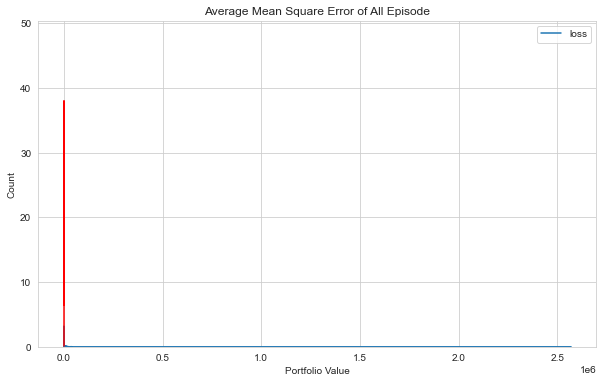

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

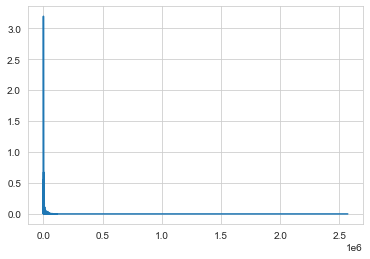

In [5]:
plt.plot(agent.model.losses)

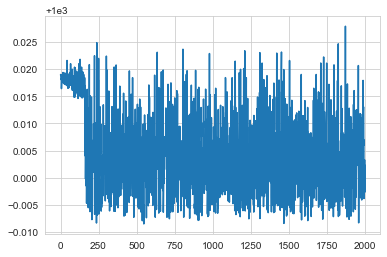

In [6]:
plt.plot(portfolio_value)

episode end value: 1000.02, duration: 0:00:00.112024
Sell: 48 times, Buy: 44 times


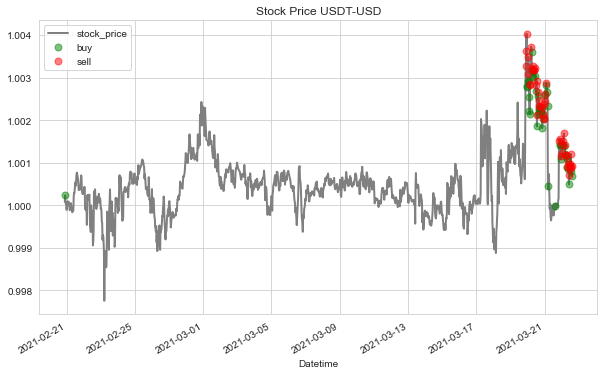

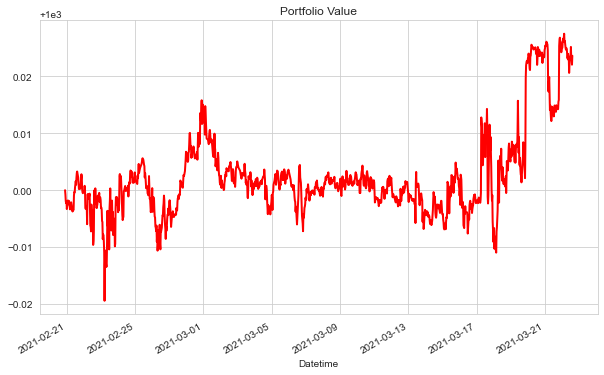

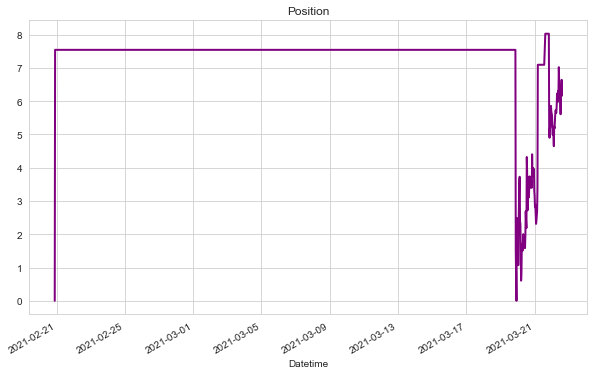

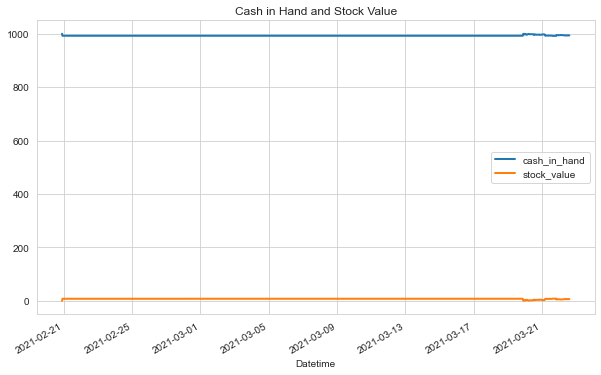

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: USDT-USD
Start: 2021-02-20 21:30:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 0.00 %
Volatility: 0.0000
shape ratio: -411.4276
Maximun drawdown: -0.00 %
Calmar ratio: 0.1729
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 0.02 %
Volatility (benchmark): 0.0038
shape ratio: -2.8558
Maximun drawdown: -0.44 %
Calmar ratio (benchmark): 0.0376


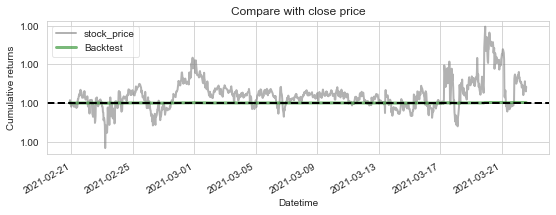

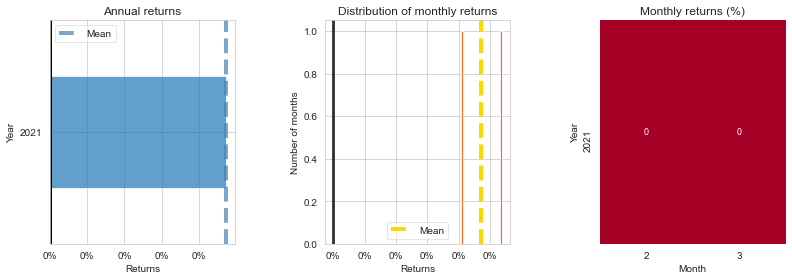

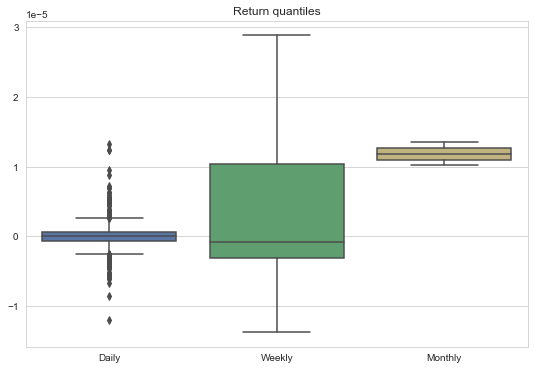

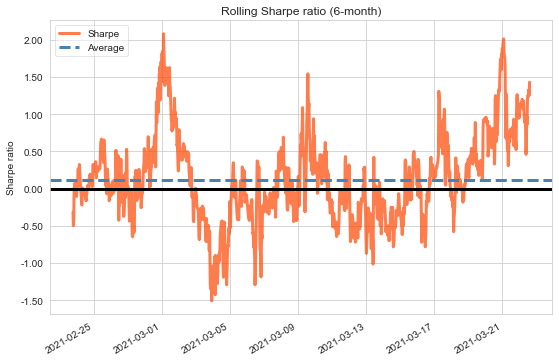

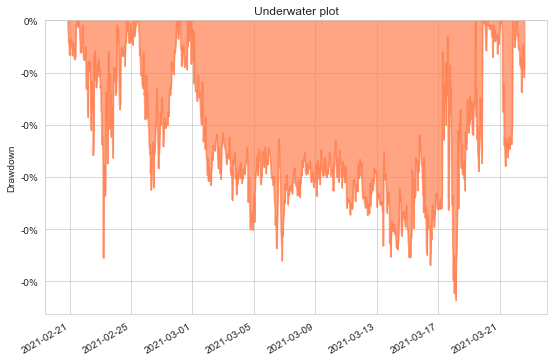

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')